# Finding the Best Machine Learning Regressor for the dataset.

In [1]:
# Basic Data Science Packages
import pandas as pd
import numpy as np

#LazyPredict package and Regressor Import
import lazypredict
from lazypredict.Supervised import LazyRegressor

#Plotting Graph
import matplotlib.pyplot as plt

#Getting Regression Metrics
from utility_functions import metrics

import warnings
warnings.filterwarnings("ignore")

C:\Users\K.N.Dheeraj\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


## Import data

In [2]:
thesis_dataset = pd.read_csv('data/final_thesis_dataset.csv',parse_dates=[0], index_col=0)

In [3]:
thesis_dataset

,DE_wind_generation_actual,DE_solar_generation_actual,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,...,humidity,dew,windspeed,winddir,pressure,visibility,cloudcover,conditions,skyType,total_renewable_generation
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,8579.00,0.00,2.62,3.71,5.13,2.55,10.55,0.16,0.00,0.00,...,100.00,1.90,4.40,180.00,nan,0.40,98.40,Overcast,1.00,8579.00
2016-01-01 01:00:00+00:00,8542.00,0.00,2.56,3.63,4.98,2.55,10.55,0.16,0.00,0.00,...,93.62,1.90,5.60,196.00,nan,0.30,59.20,Partially cloudy,2.00,8542.00
2016-01-01 02:00:00+00:00,8443.00,0.00,2.48,3.52,4.79,2.55,10.55,0.16,0.00,0.00,...,94.10,2.00,6.70,230.00,nan,1.10,98.40,Overcast,1.00,8443.00
2016-01-01 03:00:00+00:00,8295.00,0.00,2.40,3.40,4.66,2.55,10.55,0.16,0.00,0.00,...,94.06,1.10,5.10,218.00,nan,1.30,98.40,Overcast,1.00,8295.00
2016-01-01 04:00:00+00:00,7319.00,0.00,2.31,3.29,4.57,2.55,10.55,0.16,0.00,0.00,...,93.61,1.00,1.90,202.00,nan,2.10,13.80,Clear,0.00,7319.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00+00:00,15303.00,0.00,3.68,5.23,7.10,2.55,10.55,0.16,0.00,0.00,...,98.45,1.60,15.00,240.00,nan,3.90,98.40,Overcast,1.00,15303.00
2016-12-31 20:00:00+00:00,15354.00,0.00,3.76,5.31,7.08,2.55,10.55,0.16,0.00,0.00,...,98.46,1.70,14.20,239.00,nan,4.30,98.40,Overcast,1.00,15354.00
2016-12-31 21:00:00+00:00,14847.00,0.00,3.79,5.34,7.12,2.55,10.55,0.16,0.00,0.00,...,92.66,1.90,16.60,244.00,nan,8.00,98.40,Overcast,1.00,14847.00


## Split data into train and test datasets
- Fetch the first 70% records as train and rest as test
    - 8711 * 70% = 6098 records from the start (Train)
    - 8711 - 6098 = 2613 remaining records as (Test)

In [4]:
train = thesis_dataset[:6098] 
test = thesis_dataset[6098:] 

X_solar_train = train[['SWTDN', 'SWGDN', 'T']]
y_solar_train = train['DE_solar_generation_actual']
X_solar_test = test[['SWTDN', 'SWGDN', 'T']]
y_solar_test = test['DE_solar_generation_actual']

X_wind_train = train[['v1', 'v2', 'v_50m', 'z0']]
y_wind_train = train['DE_wind_generation_actual']
X_wind_test = test[['v1', 'v2', 'v_50m', 'z0']]
y_wind_test = test['DE_wind_generation_actual']

## Applying LazyRegressor on Solar Dataset

In [5]:
solar_reg = LazyRegressor(verbose=0,ignore_warnings=True)
models, predictions = solar_reg.fit(X_solar_train, X_solar_test, y_solar_train, y_solar_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:27<00:00,  1.54it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.93,0.93,1075.28,0.86
LGBMRegressor,0.93,0.93,1075.40,0.15
XGBRegressor,0.93,0.93,1090.94,1.76
PassiveAggressiveRegressor,0.93,0.93,1091.96,0.02
RANSACRegressor,0.93,0.93,1093.64,0.03
HuberRegressor,0.93,0.93,1098.57,0.06
RandomForestRegressor,0.93,0.93,1108.30,1.03
OrthogonalMatchingPursuitCV,0.93,0.93,1108.96,0.03
LinearRegression,0.93,0.93,1113.42,0.01


## Applying LazyRegressor for Wind Dataset

In [6]:
wind_reg = LazyRegressor(verbose=0,ignore_warnings=True)
models, predictions = wind_reg.fit(X_wind_train, X_wind_test, y_wind_train, y_wind_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:21<00:00,  1.95it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.90,0.90,2383.22,0.64
ExtraTreesRegressor,0.90,0.90,2393.15,0.90
HistGradientBoostingRegressor,0.90,0.90,2406.22,0.80
RandomForestRegressor,0.90,0.90,2429.91,1.61
BaggingRegressor,0.89,0.89,2449.92,0.17
LGBMRegressor,0.89,0.89,2460.63,0.12
KNeighborsRegressor,0.88,0.88,2647.33,0.05
SGDRegressor,0.88,0.88,2650.90,0.06
LassoCV,0.88,0.88,2658.27,0.09


### End Results
- For solar dataset **HistGradientBoostingRegressor** and
- For wind dataset **GradientBoostingRegressor** works the best

## Cross-Validating the findings with the scores of Linear Regression

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
hgbr = HistGradientBoostingRegressor()

In [8]:
X_solar = thesis_dataset[['SWTDN', 'SWGDN', 'T']]
y_solar = thesis_dataset['DE_solar_generation_actual']

scores_solar = cross_val_score(hgbr, X_solar, y_solar, cv=5)
print(scores_solar, "\naverage =", np.mean(scores_solar))

[0.85807896 0.94661228 0.94447233 0.95746803 0.88008925] 
average = 0.9173441664489002


## Plotting Actual vs Predictions on same plot

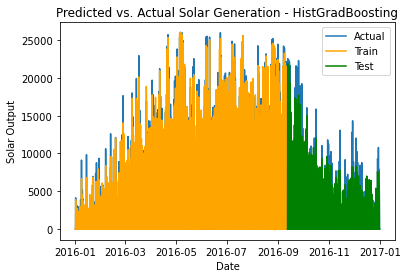

In [9]:
hgbr = HistGradientBoostingRegressor().fit(X_solar_train, y_solar_train)

train_solar_pred = hgbr.predict(X_solar_train)
test_solar_pred = hgbr.predict(X_solar_test)

# thesis_dataset = thesis_dataset.reset_index()
df = thesis_dataset[['DE_solar_generation_actual']]

train_df = train[['DE_solar_generation_actual']]
train_df.loc[:, 'DE_solar_generation_actual'] = train_solar_pred

test_df = test[['DE_solar_generation_actual']]
test_df.loc[:, 'DE_solar_generation_actual'] = test_solar_pred

# # Plot all predictions
inversetransform, =plt.plot(df, label = 'Actual')
trainpredx, =plt.plot(train_df, color='orange', label = 'Train')
testpredx, =plt.plot(test_df, color='green', label = 'Test')
plt.xlabel('Date')
plt.ylabel('Solar Output')
plt.legend(loc="upper right")
plt.title("Predicted vs. Actual Solar Generation - HistGradBoosting")
plt.show()

### Regression Metrics for Solar

In [10]:
metrics('histgrad', test['DE_solar_generation_actual'], test_solar_pred)

,MAE,MSE,RMSE,RMSLE,R2
model,,,,,
histgrad,465.13,1075.28,32.79,3.49,0.93


## Cross-validating the findings over Wind Dataset

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [12]:
X_wind = thesis_dataset[['v1', 'v2', 'v_50m', 'z0']]
y_wind = thesis_dataset['DE_wind_generation_actual']

scores_wind = cross_val_score(gbr, X_wind, y_wind, cv=5)
print(scores_wind, "\naverage =", np.mean(scores_wind))

[0.89866486 0.8504175  0.8787059  0.92984511 0.88913014] 
average = 0.8893527020571004


## Plotting Actual vs Predictions on same plot

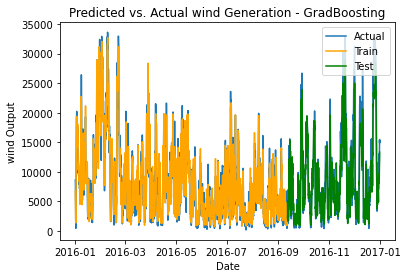

In [13]:
gbr = GradientBoostingRegressor().fit(X_wind_train, y_wind_train)

train_wind_pred = gbr.predict(X_wind_train)
test_wind_pred = gbr.predict(X_wind_test)

df = thesis_dataset[['DE_wind_generation_actual']]

train_df = train[['DE_wind_generation_actual']]
train_df.loc[:, 'DE_wind_generation_actual'] = train_wind_pred

test_df = test[['DE_wind_generation_actual']]
test_df.loc[:, 'DE_wind_generation_actual'] = test_wind_pred

# Plot all predictions
inversetransform, =plt.plot(df, label = 'Actual')
trainpredx, =plt.plot(train_df, color='orange', label = 'Train')
testpredx, =plt.plot(test_df, color='green', label = 'Test')
plt.xlabel('Date')
plt.ylabel('wind Output')
plt.legend(loc="upper right")
plt.title("Predicted vs. Actual wind Generation - GradBoosting")
plt.show()

### Regression Metrics for Wind

In [14]:
metrics('grad', test['DE_wind_generation_actual'], test_wind_pred)

,MAE,MSE,RMSE,RMSLE,R2
model,,,,,
grad,1684.61,2373.77,48.72,3.89,0.90


From the above results we can see that for solar dataset there hasn't be much difference **(92.4% -> 91.7%)** accuracy.

But for Wind dataset there has being the accuracy jump from **(85.8% -> 88.9%)** accuracy.

### Conclusion
- We have seen that due to variating nature of the way Wind and Solar produce their energy. These cannot be captured in a single model.
- Different models for solar and wind are required.
- So a combined model that captures the output their predictions seperately and combines them, could result in better accuracy.

In [15]:
from sklearn.model_selection import KFold 
from sklearn.metrics import r2_score
kf = KFold(5, True, 1)

scores = []
for train_index, test_index in kf.split(thesis_dataset):
    X_solar = thesis_dataset.iloc[train_index, :][['SWTDN', 'SWGDN', 'T']]
    y_solar = thesis_dataset.iloc[train_index, :]['DE_solar_generation_actual']
    hgbr = HistGradientBoostingRegressor().fit(X_solar, y_solar)

    X_wind = thesis_dataset.iloc[train_index, :][['v1', 'v2', 'v_50m', 'z0']]
    y_wind = thesis_dataset.iloc[train_index, :]['DE_wind_generation_actual']
    gbr = GradientBoostingRegressor().fit(X_wind, y_wind)
    
    scores.append(r2_score(
        hgbr.predict(thesis_dataset.iloc[test_index, :][['SWTDN', 'SWGDN', 'T']]) + gbr.predict(thesis_dataset.iloc[test_index, :][['v1', 'v2', 'v_50m', 'z0']]),
        thesis_dataset.iloc[test_index, :]['DE_solar_generation_actual'] + thesis_dataset.iloc[test_index, :]['DE_wind_generation_actual']))                

print(scores, "\naverage =", np.mean(scores))

[0.9475020609796467, 0.9405725476558187, 0.9394510510620339, 0.9452853795411004, 0.9366545872702404] 
average = 0.941893125301768


## Creating a Custom Regressor from the findings and plotting their predictions

In [16]:
class CustomRegressor:
    def __init__(self):
        self.solarRegressor = None
        self.windRegressor = None
        
    def fit(self, train_dataset):
        X_solar = train_dataset[['SWTDN', 'SWGDN', 'T']]
        y_solar = train_dataset['DE_solar_generation_actual']
        self.solarRegressor = HistGradientBoostingRegressor().fit(X_solar, y_solar)

        X_wind = train_dataset[['v1', 'v2', 'v_50m', 'z0']]
        y_wind = train_dataset['DE_wind_generation_actual']
        self.windRegressor = GradientBoostingRegressor().fit(X_wind, y_wind)
        return self
        
    def predict(self, prediction_dataset):
        return self.solarRegressor.predict(prediction_dataset[['SWTDN', 'SWGDN', 'T']]) + self.windRegressor.predict(prediction_dataset[['v1', 'v2', 'v_50m', 'z0']])

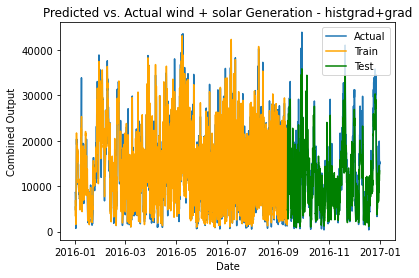

In [17]:
cr = CustomRegressor().fit(train)

train_total_pred = cr.predict(train)
test_total_pred = cr.predict(test)

df = thesis_dataset[['DE_solar_generation_actual']]
df['Total Generation'] = thesis_dataset['DE_solar_generation_actual'] + thesis_dataset['DE_wind_generation_actual']
df.drop(['DE_solar_generation_actual'], axis = 1, inplace = True)

train_df = train[['DE_solar_generation_actual']]
train_df['Total Generation'] = train_total_pred
train_df.drop(['DE_solar_generation_actual'], axis = 1, inplace = True)

test_df = test[['DE_solar_generation_actual']]
test_df['Total Generation'] = test_total_pred
test_df.drop(['DE_solar_generation_actual'], axis = 1, inplace = True)

# Plot all predictions
inversetransform, =plt.plot(df, label = 'Actual')
trainpredx, =plt.plot(train_df, color='orange', label = 'Train')
testpredx, =plt.plot(test_df, color='green', label = 'Test')
plt.xlabel('Date')
plt.ylabel('Combined Output')
plt.legend(loc="upper right")
plt.title("Predicted vs. Actual wind + solar Generation - histgrad+grad")
plt.show()

In [18]:
metrics('histgrad+grad', test['DE_solar_generation_actual'] + test['DE_wind_generation_actual'], test_total_pred)

,MAE,MSE,RMSE,RMSLE,R2
model,,,,,
histgrad+grad,1980.47,2721.37,52.17,3.95,0.89
